# Sentiment and language complexity analysis
In this notebook we will study how language complexity and sentiment evolve over time in the quotes linked to climate change. We want to see how much these two variables might have influenced the increase in the number of quotes around "climate change".
For this, we will put our focus in the USA case and look at the differences between democrats and republicans and also compare Greta with Trump.

# 1. Imports

In [1]:
import pandas as pd
import textstat
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# helper functions
from hach.text_analysis import *
from hach.data import *
from hach.cleaning import *

from tqdm.auto import tqdm
tqdm.pandas()
%load_ext autoreload
%autoreload 2

# 2. Loading data

### 2.1. Get climate dataframes
Get the quotes previsouly extracted and containing the keywords "climate change".

In [2]:
full_df, dfs = get_climate_data()

In [3]:
# cleaning
for i in range(2017, 2021):
    dfs[i] = clean_df(dfs[i])

### 2.2. Get speakers
Get information for the speakers obtained through wikidata.

In [4]:
speakers = {}
for i in range(2017, 2021):
    speakers[i] = pd.read_pickle('data/speakers_{}.pkl'.format(i))

# 3. Dataset preparation
We will be using textstat, which has previously trained models for sentiment and language complexity analysis.

### 3.1. Load classifier

In [5]:
classifier = TextClassifier.load('en-sentiment');

2021-12-16 15:51:11,552 loading file /home/jupyter-hugo/.flair/models/sentiment-en-mix-distillbert_4.pt


### 3.2. Perform sentiment analysis on climate quotes from 2019 to 2021.
The classifier will associate a "positive" or "negative" mention to each quote and its level of confidence.

In [ ]:
for i in range(2019, 2021):
    dfs[i]['sentiment'] =  dfs[i].progress_apply(lambda x : get_sentiment_score(x.quotation, classifier), axis=1)
    dfs[i].to_pickle('data/climate_df_sentiments_'+ str(i) +'.pkl')

### 3.3. Perform language complexity analysis on quotes from 2017 to 2021
The classifier will associate a score of complexity to each quote. 

In [ ]:
for i in range(2017,2021): 
    dfs[i] = pd.read_pickle('data/climate_df_sentiments_'+ str(i) +'.pkl')
    sentiment_mapping(dfs[i])
    dfs[i]['complexity'] = dfs[i].progress_apply(lambda x : get_quote_complexity(x.quotation), axis=1)
    #write to pickle
    dfs[i].to_pickle('data/climate_df_complexity'+ str(i) +'.pkl')

### 3.4. Add speaker information to dataset
We add the information obtained through wikidata to the dataset, so that we can use speaker information for the analysis and identify republicans and democrats.

In [6]:
dfs_speakers = {}
dfs = {}
for i in range(2017, 2021): 
    dfs[i] = pd.read_pickle('data/climate_df_complexity'+ str(i) +'.pkl')
    dfs_speakers[i] = dfs[i].merge(speakers[i], left_on='speaker', right_on='speaker')

In [9]:
df_speakers = pd.concat(dfs_speakers)
df_speakers.reset_index(level=0, drop=True, inplace=True)

# 4. Information extraction
At this stage, now that our dataset is ready, we will look into what kind of information we can obtain from it and if increased sentiment (in either direction) and language complexity (again, in either direction), could have had an impact on the debate around "climate change" and if Greta Thunberg also had something to do with it.

### 4.1. Top ten parties over the four years
In this part we look into the correlation between sentiment and language complexity in top ten US parties and how it evolved over a period of 4 years.

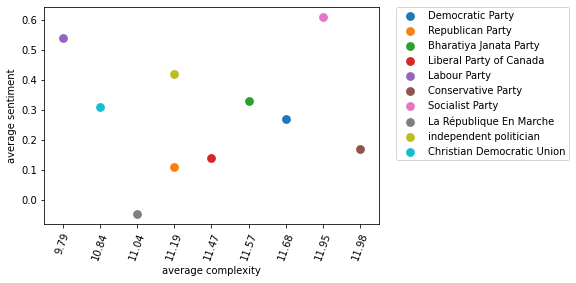

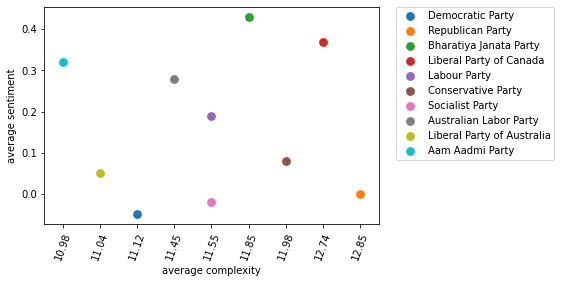

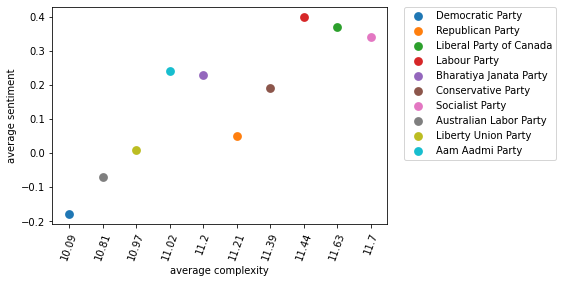

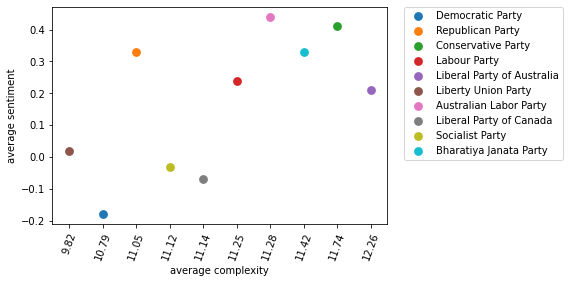

In [15]:
for i in range(2017, 2021): 
    plot_top_parties(dfs_speakers[i])

### 4.2. Language complexity within the republic party
We are now going to go into a bit more detail, by selecting specifically the republican party and see how its language complexity evolved over time.

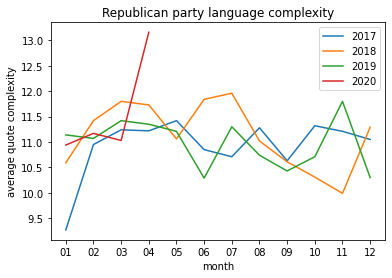

In [16]:
for i in range(2017, 2021):
    republicans = dfs_speakers[i][dfs_speakers[i].political_party.apply(lambda x : x == 'Republican Party')]
    plot_complexity_evolution(republicans.copy(), 'Republican party language complexity')
    
plt.legend(labels=["2017","2018","2019","2020"])

### 4.3. Sentiment analysis within the republican party
Again, we're getting into a bit more detail by looking at sentiment evolution in the repulican party

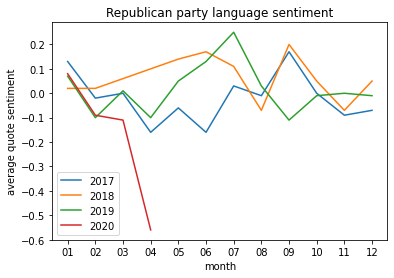

In [17]:
for i in range(2017, 2021):
    republicans = dfs_speakers[i][dfs_speakers[i].political_party.apply(lambda x : x == 'Republican Party')]
    plot_sentiment_evolution(republicans.copy(), 'Republican party language sentiment')
plt.legend(labels=["2017","2018","2019","2020"])

### 4.4. Republicans vs. Democrats
Let us now compare how the Republicans perform against the democrats in sentiment and complexity and how this comparison evolves over a period of 4 years.

Year :  2017


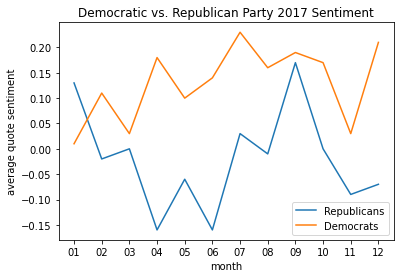

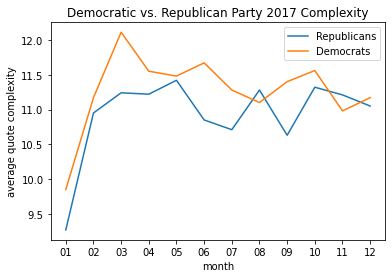


Year :  2018


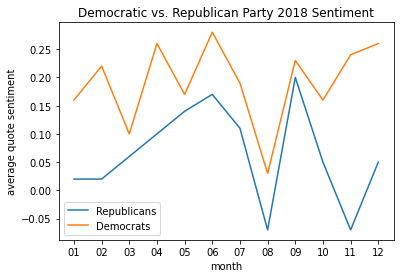

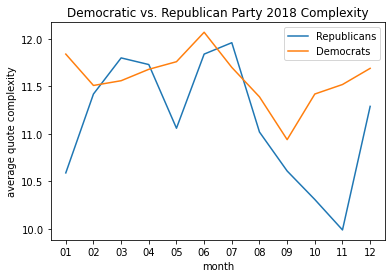


Year :  2019


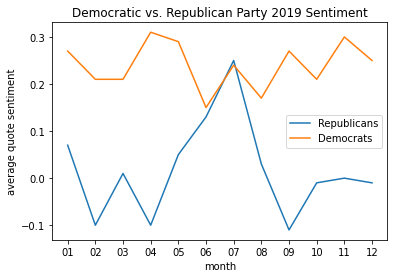

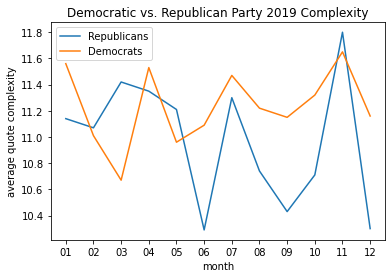


Year :  2020


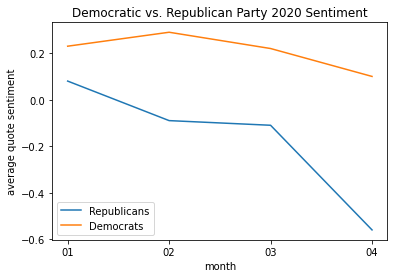

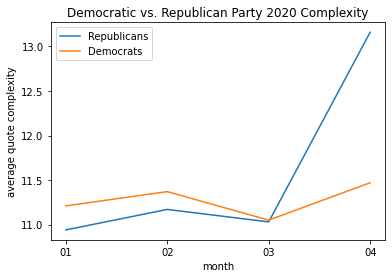

In [7]:
for i in range(2017, 2021):
    print("Year : ", i)
    republicans = dfs_speakers[i][dfs_speakers[i].political_party.apply(lambda x : x == 'Republican Party')]
    democrats = dfs_speakers[i][dfs_speakers[i].political_party.apply(lambda x : x == 'Democratic Party')]
    parties = {}
    parties[1] = republicans.copy()
    parties[2] = democrats.copy()
    plot_comparison_sentiment(parties, 'Democratic vs. Republican Party ' + str(i) + ' Sentiment', ['Republicans', 'Democrats'])
    plot_comparison_complexity(parties, 'Democratic vs. Republican Party ' + str(i) + ' Complexity', ['Republicans', 'Democrats'])
    print() # Add space

##### 4.4.1 Random quotes

In order to demonstrate the complexity and sentiment scorer in our datastory, we sampled some quotes from the dataframes. 
First we start with sampling the Republican party quotes in order to compare them to the Democratic party

In [16]:
rep_quote = df_speakers[df_speakers.political_party.apply(lambda x : x == 'Republican Party')].sample(1)
rep_quote

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,sentiment_score,complexity,quotation_count,gender,age,nationality,political_party,occupation
9883,2018-05-09-029601,Global warming may be beneficial,Scott Pruitt,[Q7437083],2018-05-09 06:35:00,1,"[[Scott Pruitt, 0.8789], [None, 0.1211]]",[http://www.networkworld.com/article/3270956/i...,E,[POSITIVE (0.7841)],0.7841,10.0,169,male,53.0,United States of America,Republican Party,lawyer


In [17]:
list(rep_quote.quotation)

['Global warming may be beneficial']

In [18]:
dem_quote = df_speakers[df_speakers.political_party.apply(lambda x : x == 'Democratic Party')].sample(1)
dem_quote

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,sentiment_score,complexity,quotation_count,gender,age,nationality,political_party,occupation
3711,2017-06-06-040923,I have proposed that California will cut its g...,Jerry Brown,"[Q152451, Q717620]",2017-06-06 23:21:00,3,"[[Jerry Brown, 0.4283], [Xi Jinping, 0.2927], ...",[http://www.dw.com/en/us-state-of-california-s...,E,[NEGATIVE (0.8142)],-0.8142,10.0,344,male,83.0,United States of America,Democratic Party,lawyer


In [19]:
list(dem_quote.quotation)

["I have proposed that California will cut its greenhouse gases 40 per cent below 1990 levels and that we'll have 50 per cent of our electricity from renewables,"]

### 4.5. Greta vs. Trump
Let us now perform the same analysis at the individual level and see how it compares to previous results.
We are focusing on Greta, which could be considered to be close to Democrat ideas and Donald Trump, who has recently been know as the most emblematic Republican politican for obvious reasons.

Year :  2017


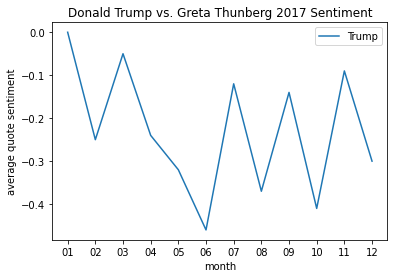

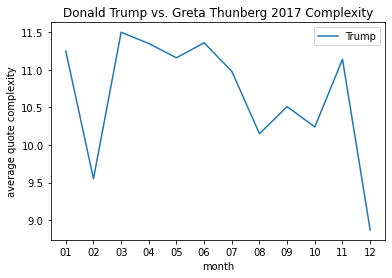


Year :  2018


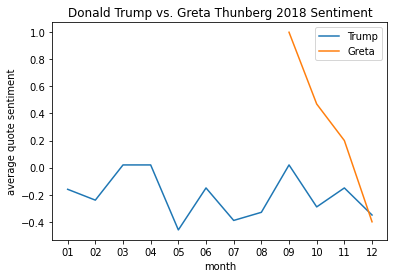

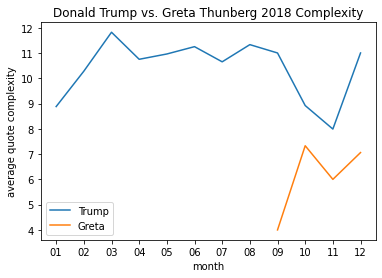


Year :  2019


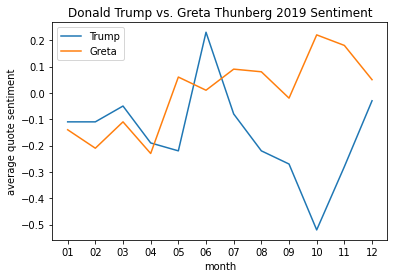

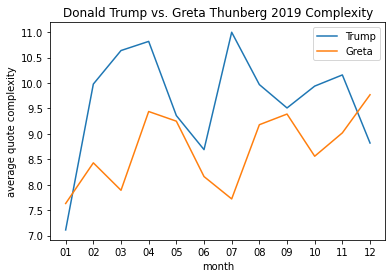


Year :  2020


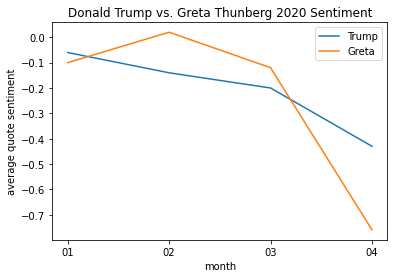

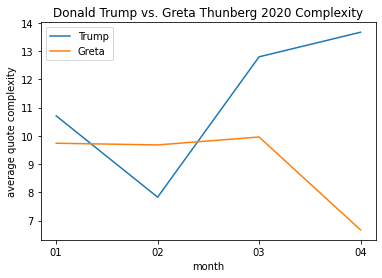

In [5]:
for i in range(2017, 2021):
    print("Year : ", i)
    trump = dfs_speakers[i][dfs_speakers[i].speaker.str.contains('donald trump', na=False, case=False)]
    greta = dfs_speakers[i][dfs_speakers[i].speaker.str.contains('greta thunberg', na=False, case=False)]
    sets = {}
    sets[1] = trump.copy()
    sets[2] = greta.copy()
    plot_comparison_sentiment(sets, 'Donald Trump vs. Greta Thunberg ' + str(i) + ' Sentiment', ['Trump', 'Greta'])
    plot_comparison_complexity(sets, 'Donald Trump vs. Greta Thunberg ' + str(i) + ' Complexity', ['Trump', 'Greta'])
    print() # Add space

##### 4.5.1 Extract some random quotes
For the sake of our datastory, we will extract some random quotes from the groups that we are comparing to one another

In [22]:
greta = dfs_speakers[2019][dfs_speakers[2019].speaker.str.contains('greta thunberg', na=False, case=False)].sample(n=1)
print('sentiment score: {}, complexity score: {}'.format(greta.sentiment_score, greta.complexity))
list(greta.quotation)

sentiment score: 3026    0.7075
Name: sentiment_score, dtype: float64, complexity score: 3026    13.0
Name: complexity, dtype: float64


['If standing up against the climate and ecological breakdown and for humanity is against the rules, then the rules must be broken.']

### 4.6. Party sentiment
We will now look at how sentiment of top parties evolved over time.
What is interesting here is the comparison between the the top 10 parties over time.

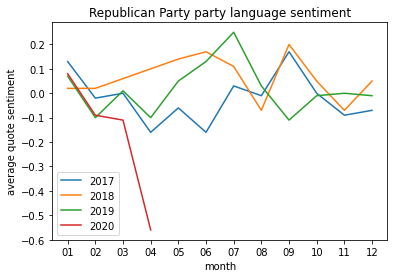

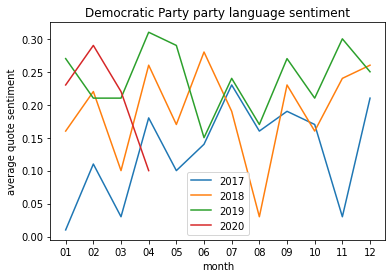

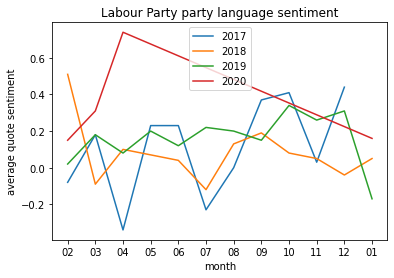

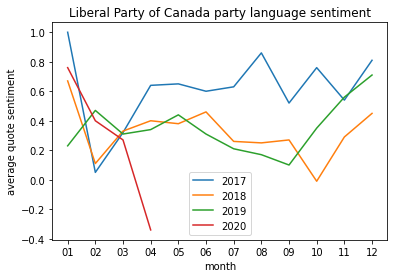

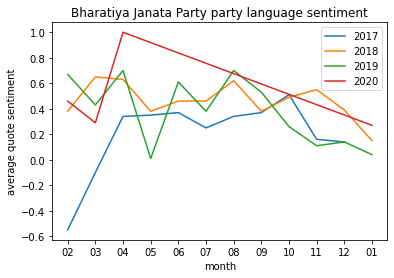

In [31]:
top_parties = ['Republican Party', 'Democratic Party', 'Labour Party', 'Liberal Party of Canada', 'Bharatiya Janata Party']
for party in top_parties: 
    #creates new plot
    plt.figure()
    for i in range(2017, 2021):
        df = dfs_speakers[i][dfs_speakers[i].political_party.apply(lambda x : x == party)]
        plot_sentiment_evolution(df.copy(), party + ' party language sentiment')
    plt.legend(labels=["2017","2018","2019","2020"])

### 4.6. Party language complexity
We will now look at how language complexity of top parties evolved over time.
What is interesting here is the comparison between the the top 10 parties over time.

In [ ]:
top_parties = ['Republican Party', 'Democratic Party', 'Labour Party', 'Liberal Party of Canada', 'Bharatiya Janata Party']


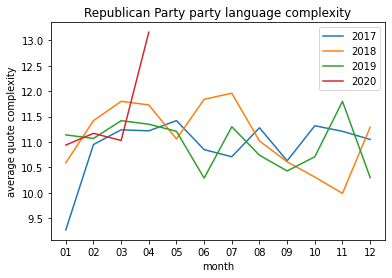

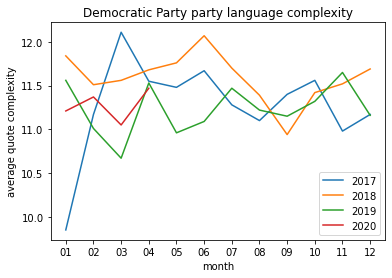

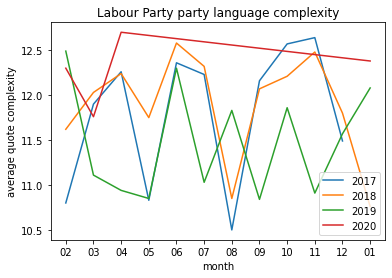

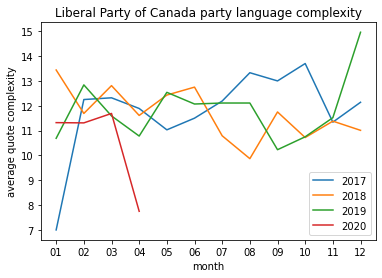

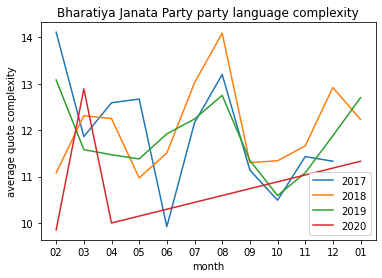

In [21]:
top_parties = ['Republican Party', 'Democratic Party', 'Labour Party', 'Liberal Party of Canada', 'Bharatiya Janata Party']
for party in top_parties: 
    #creates new plot
    plt.figure()
    for i in range(2017, 2021):
        df = dfs_speakers[i][dfs_speakers[i].political_party.apply(lambda x : x == party)]
        plot_complexity_evolution(df.copy(), party + ' party language complexity')
    plt.legend(labels=["2017","2018","2019","2020"])

### 4.7. US vs Europe
Let us now take a step back and also look outside of the US. Let us see how Europe compares to the USA on language complexity and sentiment over time matters.

##### 4.7.1. European countries
We hand-pick the European countries contained in the dataset.

In [31]:
countries_europe = ['France', 'United Kingdom', 'Portugal', 'Germany', 'Vatican City', 'Norway', 'Finland', 'Luxembourg', 'Ireland', 
                    'Poland', 'Spain', 'Scotland', 'Austria', 'Italy', 'Turkey', 'Denmark', 'Kingdom of the Netherlands', 'Slovakia', 
                    'Iceland', 'Sweden', 'Malta', 'Bulgaria', 'Cyprus', 'Switzerland', 'Netherlands', 'England','Greece', 'Belgium', 
                    'Wales','Slovenia', 'Estonia', 'Monaco', 'Czechoslovakia', 'Russia', 'Kingdom of England',  'United Kingdom of Great Britain and Ireland',
                    'Hungary','Northern Ireland',  'Czech Republic', 'Armenia', 'Great Britain', "People's Republic of Bulgaria", 'Kingdom of Scotland', 
                    'The Netherlands', 'Romania','Kosovo', "Federal People's Republic of Yugoslavia", 'Gibraltar', 'Lithuania']

##### 4.7.2. Complexity and sentiment analysis

In [32]:
US = df_speakers[df_speakers.nationality.apply(lambda x : str(x) == 'United States of America')]
europe = df_speakers[df_speakers.nationality.apply(lambda x : str(x) in countries_europe)]

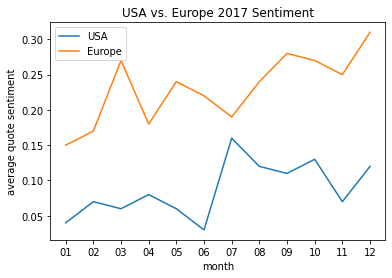

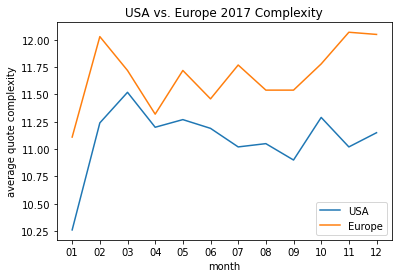

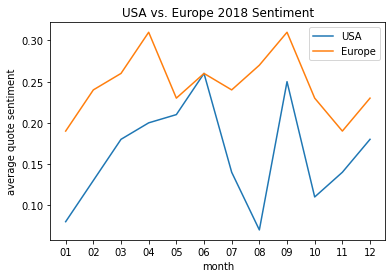

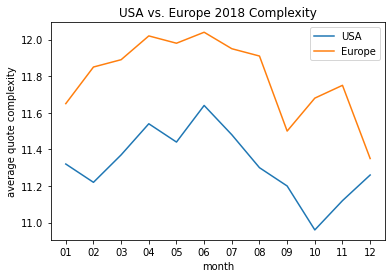

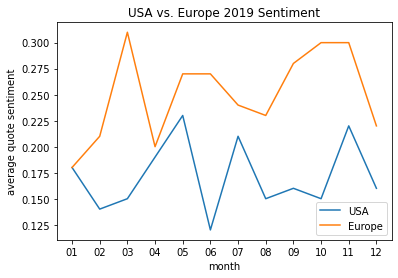

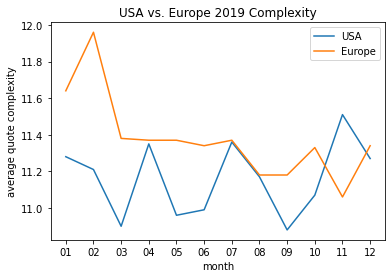

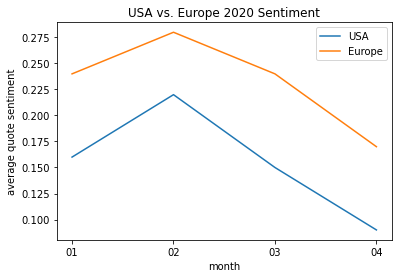

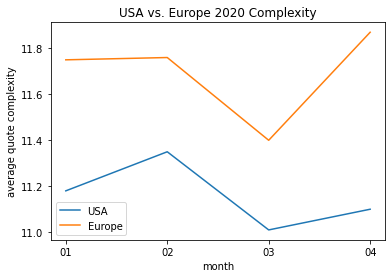

In [43]:
for i in range(2017, 2021):
    US = dfs_speakers[i][dfs_speakers[i].nationality.apply(lambda x : str(x) == 'United States of America')]
    europe = dfs_speakers[i][dfs_speakers[i].nationality.apply(lambda x : str(x) in countries_europe)]
    sets = {}
    sets[1] = US.copy()
    sets[2] = europe.copy()
    plot_comparison_sentiment(sets, 'USA vs. Europe ' + str(i) + ' Sentiment', ['USA', 'Europe'])
    plot_comparison_complexity(sets, 'USA vs. Europe ' + str(i) + ' Complexity', ['USA', 'Europe'])

##### 4.7.3 Random quotes


Again, for our datastory we extract random samples from the US and Europe to compare them 

In [10]:
us_quote = US.sample(1)
us_quote

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,sentiment_score,complexity,quotation_count,gender,age,nationality,political_party,occupation
7194,2017-06-01-164828,Withdrawing from the Paris climate agreement i...,Mark Zuckerberg,[Q36215],2017-06-01 05:52:02,93,"[[Mark Zuckerberg, 0.6468], [None, 0.1753], [T...",[http://money.cnn.com/2017/06/01/news/ceos-res...,E,[NEGATIVE (0.9991)],-0.9991,11.0,41,male,37.0,United States of America,None,programmer


In [11]:
list(us_quote.quotation)

["Withdrawing from the Paris climate agreement is bad for the environment, bad for the economy, and it puts our children's future at risk,"]

In [18]:
europe_quote = europe.sample(1)
europe_quote

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,sentiment_score,complexity,quotation_count,gender,age,nationality,political_party,occupation
52449,2019-03-08-089243,The European Union must align our climate and ...,Kimmo Tiilikainen,[Q964549],2019-03-08,1,"[[Kimmo Tiilikainen, 0.8436], [None, 0.1564]]",[http://eandt.theiet.org/content/articles/2019...,E,[POSITIVE (0.8459)],0.8459,10.0,7,male,55.0,Finland,Centre Party,politician


In [19]:
list(europe_quote.quotation)

['The European Union must align our climate and energy policy according to the 1.5 ° C [ rise in average global temperatures ] target. That means that the EU must achieve carbon neutrality by 2050,']

This specific quote is used in the datastory to show the impact of natural disasters on the climate change debate

In [ ]:
storm_quote = US[(US.date.dt.year == 2019) & (US.date.dt.month == 10) & (US.quotation.str.contains('storm', na=False, case= False))].sample(1)
storm_quote


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,sentiment_score,complexity,quotation_count,gender,age,nationality,political_party,occupation
26989,2019-10-29-060560,New Jersey is extremely vulnerable to the impa...,Phil Murphy,"[Q260042, Q3378818, Q7182210, Q7182211]",2019-10-29 18:34:20,6,"[[Phil Murphy, 0.4801], [None, 0.4379], [Cathe...",[http://newstimes.com/news/article/Murphy-comm...,E,[POSITIVE (0.998)],0.998,20.0,38,male,64.0,United States of America,Democratic Party,diplomat


In [27]:
list(storm_quote.quotation)

["New Jersey is extremely vulnerable to the impacts of sea-level rise and global warming, and today's executive order outlines a bold and comprehensive set of actions to ensure that our communities and infrastructure are more resilient against future storms,"]

# 5. Plots for the website

We have used matplotlib to have a look at our results and know what to use for the website. We are now going to work with another library, Plotly, to export just what we want for the website and make it interactive.

### 5.1 Trump vs Greta

In [61]:
# extract climate quotes from trump and greta
trump = df_speakers[df_speakers.speaker.str.contains('donald trump', na=False, case=False)]
greta = df_speakers[df_speakers.speaker.str.contains('greta thunberg', na=False, case=False)]

In [23]:
# get the monthly average of all metrics
trump_mean = trump.set_index('date').groupby(pd.Grouper(freq="m")).mean().reset_index().add_prefix("trump_")
greta_mean = greta.set_index('date').groupby(pd.Grouper(freq="m")).mean().reset_index().add_prefix("greta_")

In [ ]:
# merge monthly averages
trump_greta_mean = trump_mean.merge(greta_mean, how="outer", left_on="trump_date", right_on="greta_date")
trump_greta_mean = trump_greta_mean[~trump_greta_mean.greta_date.isna()]

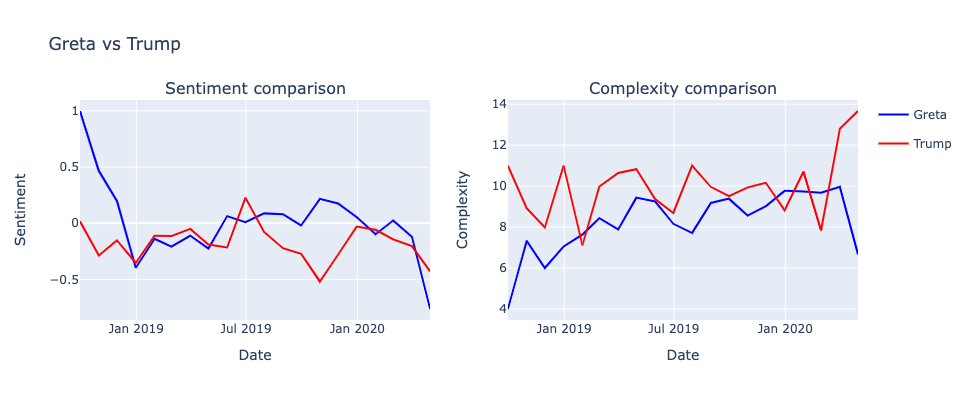

In [76]:
# plot both sentiment and complexity
plot_greta_vs_trump(trump_greta_mean)

## 5.3 Republicans vs Democrats

In [52]:
# extract climate quotes from the republican and democratic parties
republican = df_speakers[df_speakers.political_party == "Republican Party"]
democratic = df_speakers[df_speakers.political_party == "Democratic Party"]

In [53]:
# get the monthly average of all metrics
republican_mean = republican.set_index('date').groupby(pd.Grouper(freq="m")).mean().reset_index().add_prefix("republican_")
democratic_mean = democratic.set_index('date').groupby(pd.Grouper(freq="m")).mean().reset_index().add_prefix("democratic_")

In [54]:
# merge monthly averages
parties_mean = republican_mean.merge(democratic_mean, how="outer", left_on="republican_date", right_on="democratic_date")

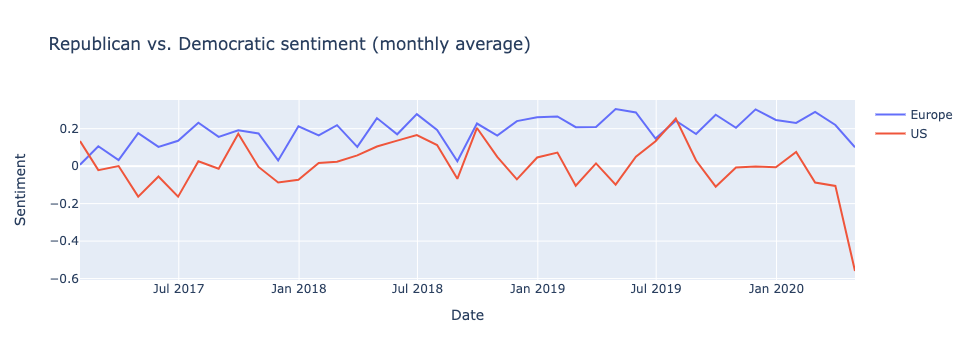

In [58]:
# plot sentiment
plot_republicans_democrats_sentiment(parties_mean)

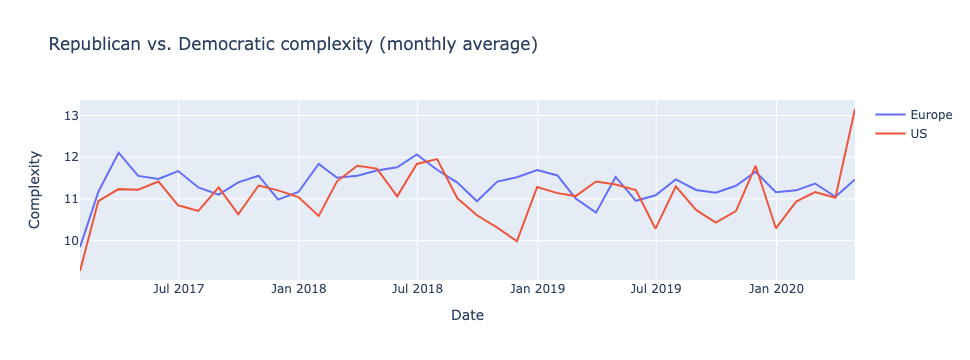

In [59]:
# plot complexity
plot_republicans_democrats_complexity(parties_mean)

### 5.4 US vs Europe

In [33]:
# get the monthly average of all metrics from the US and europe quote datasets
US_mean = US.set_index('date').groupby(pd.Grouper(freq="m")).mean().reset_index().add_prefix('us_')
europe_mean = europe.set_index('date').groupby(pd.Grouper(freq="m")).mean().reset_index().add_prefix('europe_')

In [34]:
# merge monthly averages
continent_mean = US_mean.merge(europe_mean, how="outer", left_on="us_date", right_on="europe_date")

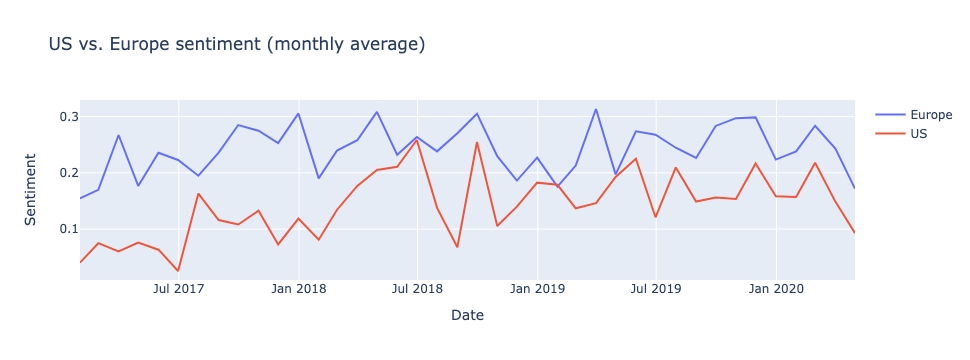

In [50]:
# plot sentiment
plot_europe_us_sentiment(continent_mean)

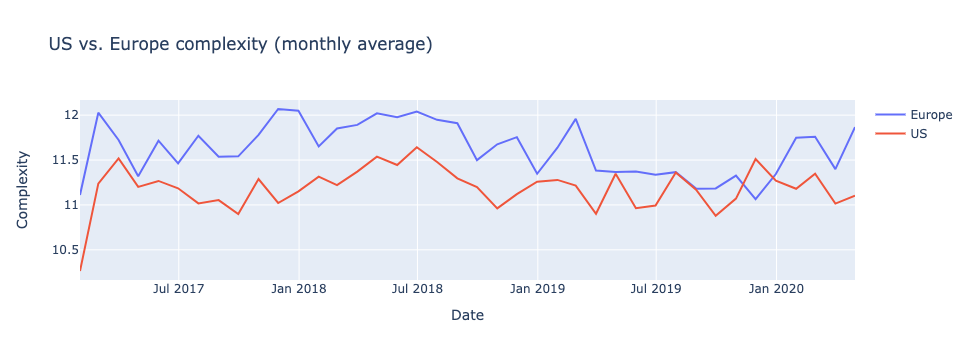

In [48]:
# plot complexity
plot_europe_us_complexity(continent_mean)